# Title: Make_ROCcurve
### Author: Mathieu Giguere

Brief: Uses the output of a machine learning model to make a ROC curve.

Preconditions: Needs '_results.csv' and '_ROCproba.csv'

### Importing modules and packages

In [1]:
import pandas as pd
import numpy as np
np.bool = np.bool_
np.int = np.int_
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, matthews_corrcoef, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import glob
import os

### Specify parameters

In [2]:
drug = 'micafungin' # choices are : 'caspofungin', 'anidulafungin', 'micafungin'
strain = 'BY4741' # currently only supports 'BY4741'
locus = 'FKS1-HS1' # currently only supports 'FKS1-HS1' and 'FKS1-HS2'
assay = 'orthologs' # choices are : 'orthologs', 'mardy'

### Specify paths

In [3]:
outpath = f'{strain}_{locus}/'
ML_data_path = f'{outpath}/{drug}_ML_{assay}_results.csv'
ML_ROC_path = f'{outpath}/{drug}_ML_{assay}_ROCproba.csv'

### Read the ML output file.

In [4]:
df = pd.read_csv(ML_data_path)

y_test = df['y_test'].tolist()

y_pred = df['y_pred'].tolist()

proba_df = pd.read_csv(ML_ROC_path)

proba = proba_df['0'].tolist()

### Plot ROC curve

AUC : 0.90625


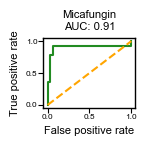

In [5]:
fpr, tpr, thresh = roc_curve(y_test, proba, pos_label='sensitive')
auc_score = roc_auc_score(y_test, proba)
print(f"AUC : {auc_score}")

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, p_thresh = roc_curve(y_test, random_probs, pos_label='sensitive')

# Make ROC curve plot.
rc_dict = {'font.family':'Arial',
           'font.size':8,
           'axes.linewidth': 1, 'grid.linewidth': 1,
           'axes.labelsize':8,'axes.titlesize':8,
           'xtick.labelsize':6, 'ytick.labelsize':6,
           'xtick.major.pad':1, 'ytick.major.pad':1,
          }

plt.rcParams.update(rc_dict)

plt.figure(figsize=(1.5, 1.5))
plt.plot(fpr, tpr, color='forestgreen')
plt.plot(p_fpr, p_tpr, linestyle='--', color='orange')
plt.title(f'{drug.title()}\nAUC: {auc_score:.2f}')
plt.locator_params(axis='both', nbins=3) 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.tight_layout()

plt.savefig(f'{outpath}/{assay}_{drug}_ROCcurve.svg', format='svg', dpi=300)